## Lab 1 - ML Evaluation

### Task \#1
Create a Jupyter Notebook to present your analysis and perform an
exploratory data analysis **(EDA)** on **flights.csv** file

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import display, Markdown

# read flights.csv into flights_df
flights_df = pd.read_csv("flights.csv")
display(Markdown('**flights.csv**'),flights_df)

**flights.csv**

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T11:00:00Z


In [2]:
# Task 1.1  analyze flights_df with sweetviz
import sweetviz as sv
flight_report = sv.analyze(flights_df)
flight_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
# Task 1.2.1 visualize the Pairwise columns in flights_df with go.Splom
visualizable_feature_names = flights_df.columns[1: -1] 
num_visualizable_features = len(visualizable_feature_names)

fig_scatmat = go.Figure(data=go.Splom(
                        dimensions=[dict(label=feature, values=flights_df[feature]) \
                                    for feature in visualizable_feature_names], \
                        marker=dict(showscale=False, line_color='white', line_width=0.5)))

fig_scatmat.update_layout(title='Pairwise feature scatter plots', \
                  width=180 * num_visualizable_features, \
                  height=180 * num_visualizable_features)

fig_scatmat.show()
# current cell output is removed to have a much smaller file size

In [ ]:
# Task 1.2.1 visualize the Pairwise columns by seaborn.pairplot(). 
# Compared with go.Splom(), it has a much smaller notebook file size
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(flights_df.sample(1000), vars=['dep_delay','arr_delay','carrier','origin','distance','dest','air_time','hour','minute','time_hour'])

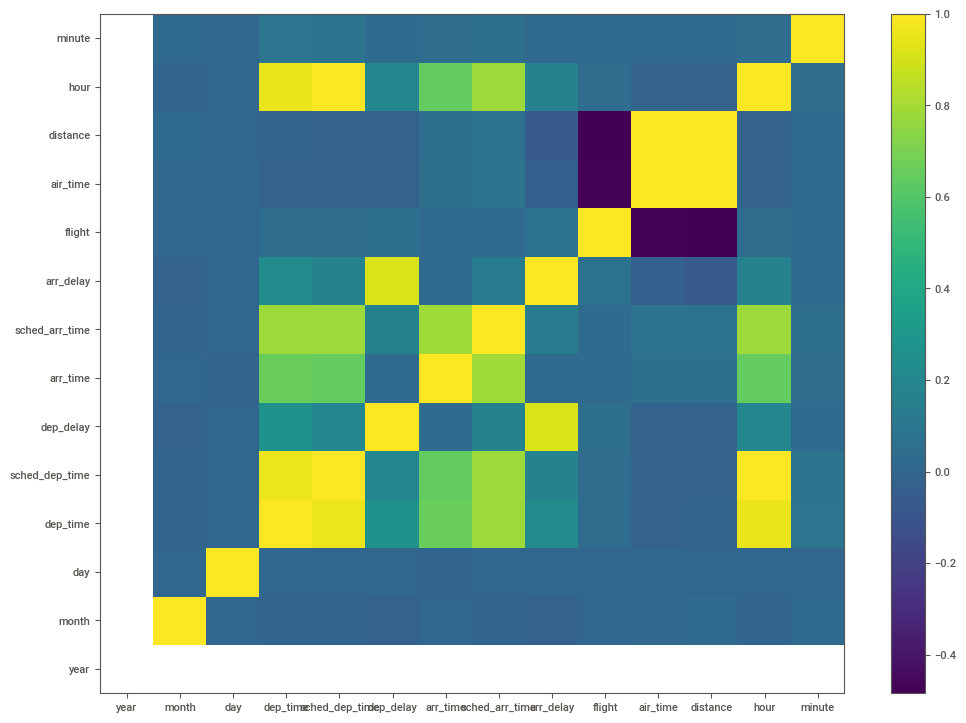

In [15]:
# Task 1.3 Plot correlation matrix for columns in flights_df
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 9))
corr = flights_df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

### Task \#2
Create at least 5 different views (reports) to the team using the imported
dataset.

**Task \#2.1** Demonstrate the relation between **flight route** and **arrival delayed** time. It shows the flight **distance** has no obviously relation to arrival delayed time. Routes with short distance are a little more easily to delay.

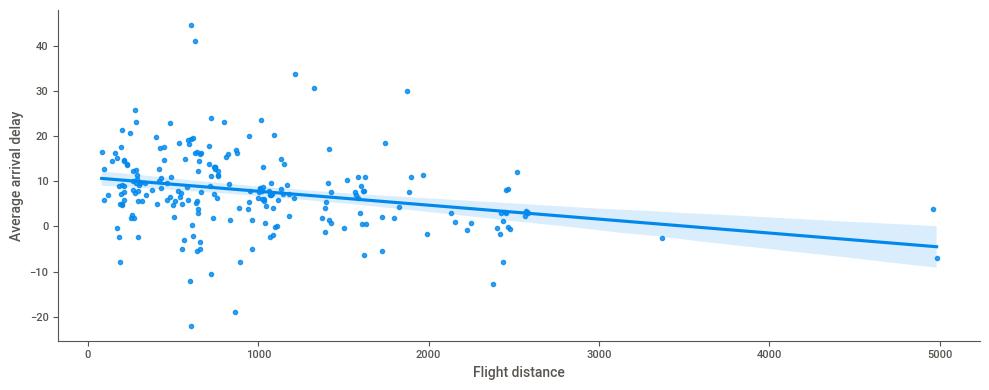

distance  arr_delay
origin dest                     
EWR    ALB      143.0  14.397129
       ANC     3370.0  -2.500000
       ATL      746.0  13.233183
       AUS     1504.0  -0.474399
       AVL      583.0   8.804781
...               ...        ...
LGA    SYR      198.0   9.252788
       TPA     1010.0   8.206491
       TVC      655.0  15.972603
       TYS      647.0   3.894340
       XNA     1147.0   7.114245

[223 rows x 2 columns]

In [20]:
# Task 2.1 focus on columns 'origin','dest','distance','arr_delay'
df=flights_df.loc[:,['origin','dest','distance','arr_delay']].dropna()
t = df.groupby(['origin','dest']).mean()

import seaborn as sns
sns.set_context({"figure.figsize":(15,8)})
ax = sns.lmplot(data=t, x="distance", y='arr_delay',height=4, # make the plot 5 units high
    aspect=2.5)
ax.set(xlabel='Flight distance', ylabel='Average arrival delay')
plt.show()
display(t)

**Task \#2.2** Demonstrate the relation between **departure delay** and **arrival delay**. About **70%** departure delay may be related to the arrival delay. 

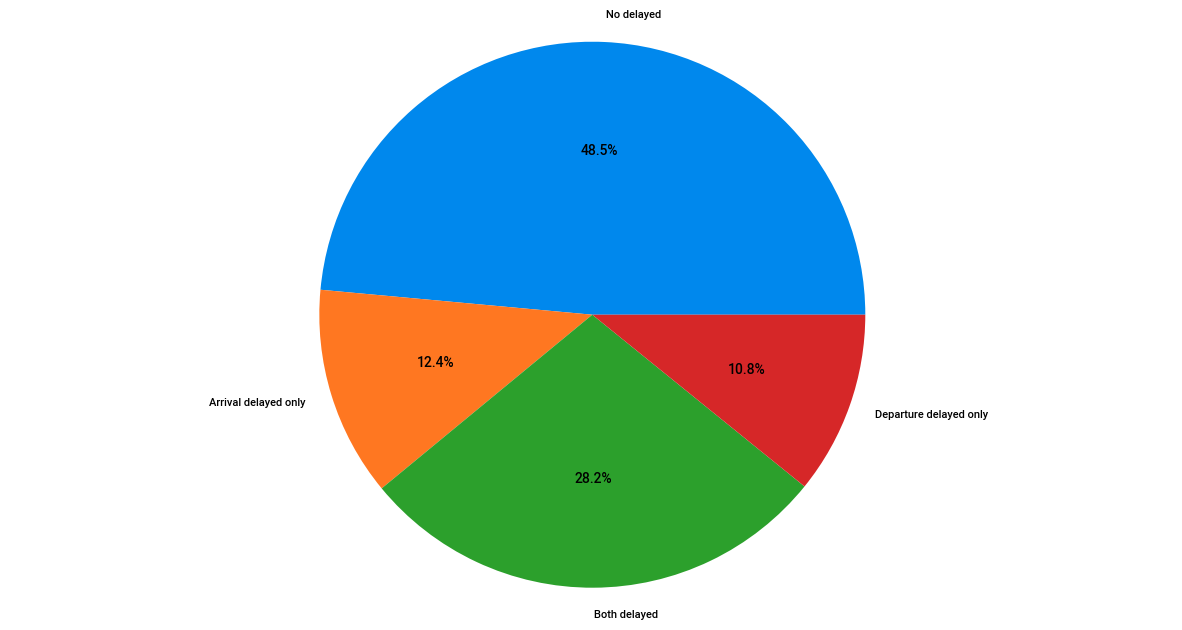

,Name,Count,Percentage
0,No delayed,158900,0.485419
1,Arrival delayed only,40701,0.124336
2,Both delayed,92303,0.281974
3,Departure delayed only,35442,0.108271


In [26]:
# Task 2.2 focus on columns 'dep_delay','arr_delay'
df=flights_df.loc[:,['dep_delay','arr_delay']]
df=df.dropna()
total_count = len(df)
dep_delay_only_count = len(df.loc[ (df['dep_delay']>0) & (df['arr_delay']<=0) ])  
arr_delay_only_count = len(df.loc[ (df['dep_delay']<=0) & (df['arr_delay']>0) ])  
both_dep_arr_delay_count = len(df.loc[ (df['dep_delay']>0) & (df['arr_delay']>0) ])  
no_delay_count = len(df.loc[ (df['dep_delay']<=0) & (df['arr_delay']<=0) ])  

df = pd.DataFrame({
    'Name' : ['No delayed', 'Arrival delayed only','Both delayed','Departure delayed only'],
    "Count" : [no_delay_count,arr_delay_only_count,both_dep_arr_delay_count,dep_delay_only_count],
    "Percentage" : [no_delay_count/total_count,arr_delay_only_count/total_count,both_dep_arr_delay_count/total_count,dep_delay_only_count/total_count],
})
import matplotlib.pyplot as plt
plt.pie(df['Count'], labels=df['Name'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()
display(df)


**Task \#2.3** Demonstrate the relation between **departure delay** and **Departure airport**. More flights may caused more departure delay. 

In [29]:
# utility function to show the features
def drawstackchart(dataset, group_col, value_col, labels = ["No delayed", "Arrival delayed"], sort = True , fsize = 12):
    df=dataset.loc[:,[group_col,value_col]].dropna()
    df_delayed = df.loc[df[value_col]>0]
    t = df.groupby([group_col]).count()
    t1 = df_delayed.groupby([group_col]).count()
    t1['total']=t[value_col]
    t1['no_delay']=t1['total']-t1[value_col]
    t1['percentage']=t1[value_col]/t1['total']
    if sort==True:
        t1=t1.sort_values('percentage',ascending=False)

    import pandas as pd
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(fsize,fsize/3*2))
    t1[['no_delay',value_col]].plot(kind='bar', stacked=True, ax=ax)
    ax.legend(labels);
    for i, label in enumerate(list(t1.index)):
        score = t1.loc[label]['percentage']
        h=t1.loc[label]['total']
        ax.annotate(f'{score:.1%}', (i - 0.2, h+1000))
    plt.show()
    display(t1)


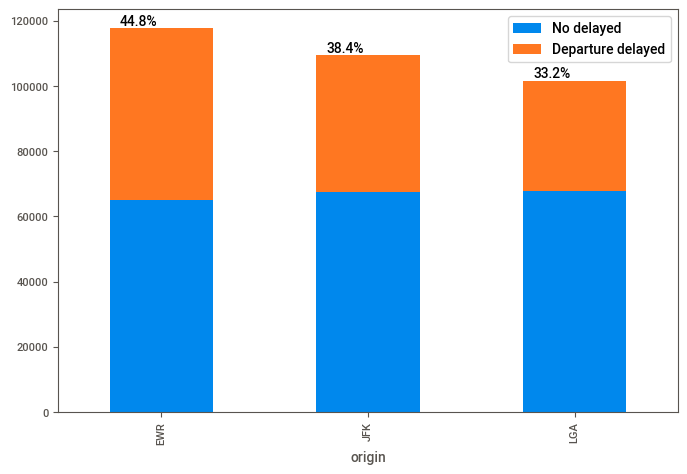

,dep_delay,total,no_delay,percentage
origin,,,,
EWR,52711,117596,64885,0.448238
JFK,42031,109416,67385,0.384139
LGA,33690,101509,67819,0.331892


In [30]:
# Task 2.3 focus on columns 'dep_delay','origin'
drawstackchart(flights_df, 'origin','dep_delay', sort=False,labels = ["No delayed", "Departure delayed"],fsize = 8 )

**Task \#2.4** Demonstrate the relation between **arrival delay** and **Month**. There are more delay in the months with holidays.

#### Month is sorted according to the delay rate in below chart

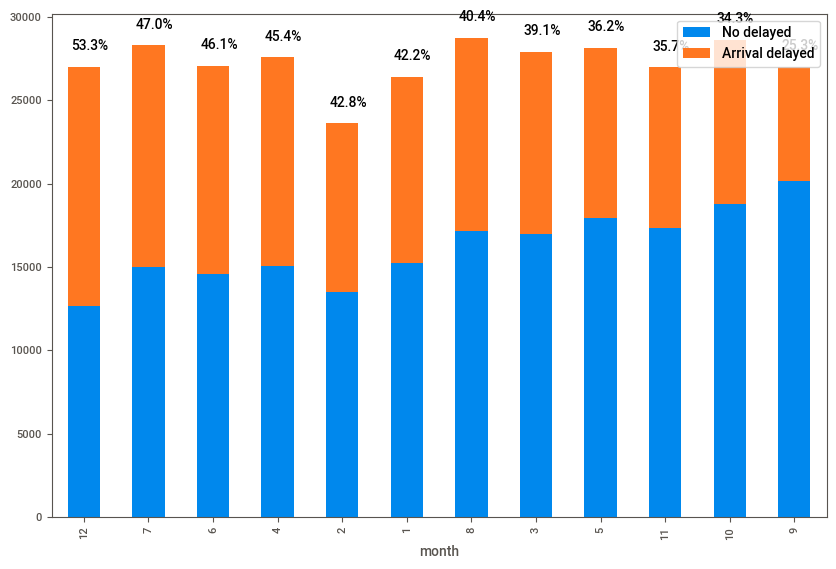

,arr_delay,total,no_delay,percentage
month,,,,
12,14394,27020,12626,0.532717
7,13304,28293,14989,0.470222
6,12490,27075,14585,0.461311
4,12522,27564,15042,0.454288
2,10100,23611,13511,0.427767
1,11150,26398,15248,0.422380
8,11629,28756,17127,0.404403
3,10919,27902,16983,0.391334
5,10189,28128,17939,0.362237


In [64]:
# Task 2.4 focus on columns 'month','arr_delay'
display(Markdown('#### Month is sorted according to the delay rate in below chart'))
drawstackchart(flights_df, 'month','arr_delay', sort=True, fsize=10)


**Task \#2.5** Demonstrate the relation between **arrival delay** and **Hour**. There are more delay when flights depart at evening.

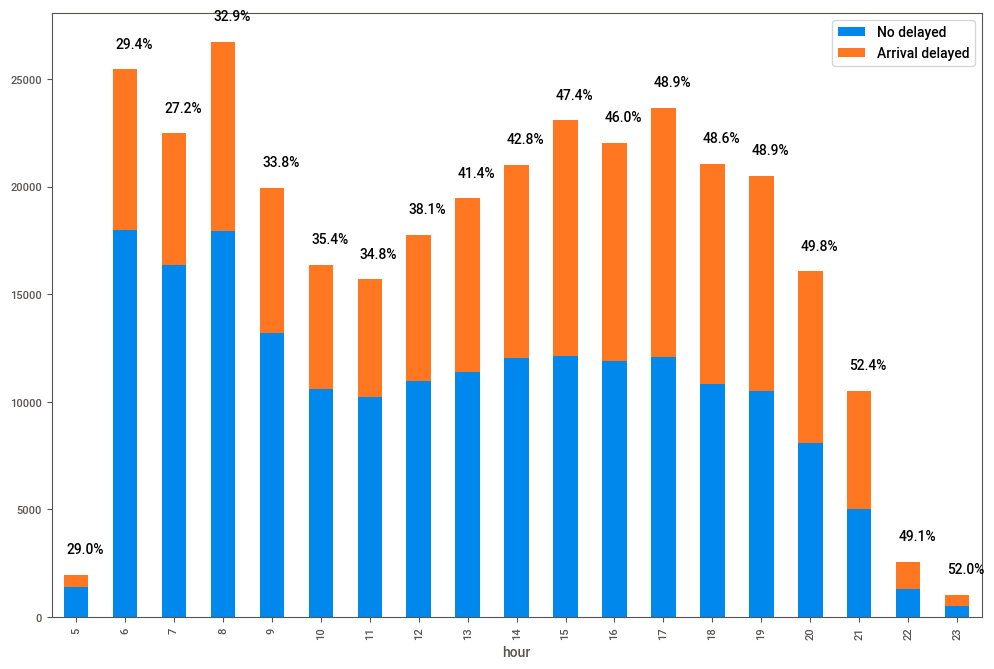

,arr_delay,total,no_delay,percentage
hour,,,,
5,563,1940,1377,0.290206
6,7484,25447,17963,0.294101
7,6113,22475,16362,0.271991
8,8797,26734,17937,0.329057
9,6745,19931,13186,0.338418
10,5794,16370,10576,0.353940
11,5467,15689,10222,0.348461
12,6759,17744,10985,0.380917
13,8050,19457,11407,0.413733


In [34]:
# Task 2.5 focus on columns 'hour','arr_delay'
drawstackchart(flights_df, 'hour','arr_delay', sort=False)

### Task \#3
Create a new dataset named (**pop_data**) with flight data from airlines UA
(United Airlines) and DL (Delta Airlines).

In [72]:
# Task 3 dataset with flight data from UA and DL
def do_sample(dataset, company):
    #select the sample with 'arr_delay' time larger than 0
    df = dataset.loc[ (dataset['arr_delay']>0) & (dataset['carrier']==company) , ['carrier','arr_delay']]
    df = df.sample(20000) if len(df)>20000 else df
    return df

ua = do_sample(flights_df, 'UA')
dl = do_sample(flights_df, 'DL')
pop_data=pd.concat([ua,dl]).reset_index(drop=True)
display(pop_data)

,carrier,arr_delay
0,UA,32.0
1,UA,1.0
2,UA,110.0
3,UA,25.0
4,UA,29.0
...,...,...
36408,DL,3.0
36409,DL,68.0
36410,DL,10.0
36411,DL,1.0


### Task \#4
Create two new datasets (“**dl**” and “**ua**”) of 1000 observations each from
the “**pop_data**” dataset

In [40]:
# Task 4 Create two new datasets (“dl” and “ua”)
ua = pop_data.loc[pop_data['carrier']=='UA'].sample(1000).reset_index(drop=True)
ua['sample_id'] = 1
display(Markdown("**Dataset UA:**"))
display(ua)
dl = pop_data.loc[pop_data['carrier']=='DL'].sample(1000).reset_index(drop=True)
dl['sample_id'] = 2
display(Markdown("**Dataset DL:**"),dl)

**Dataset UA:**

,carrier,arr_delay,sample_id
0,UA,64.0,1
1,UA,130.0,1
2,UA,50.0,1
3,UA,56.0,1
4,UA,28.0,1
...,...,...,...
995,UA,28.0,1
996,UA,21.0,1
997,UA,8.0,1
998,UA,16.0,1


**Dataset DL:**

,carrier,arr_delay,sample_id
0,DL,13.0,2
1,DL,37.0,2
2,DL,45.0,2
3,DL,1.0,2
4,DL,33.0,2
...,...,...,...
995,DL,1.0,2
996,DL,17.0,2
997,DL,1.0,2
998,DL,35.0,2


### Task \#5
Create a new dataset (**samples**) containing the data of the 2 samples
created in the previous item to be used in future analysis

In [41]:
# Task 5
samples = pd.concat([ua,dl]).reset_index(drop=True)
display(samples)

,carrier,arr_delay,sample_id
0,UA,64.0,1
1,UA,130.0,1
2,UA,50.0,1
3,UA,56.0,1
4,UA,28.0,1
...,...,...,...
1995,DL,1.0,2
1996,DL,17.0,2
1997,DL,1.0,2
1998,DL,35.0,2


### Task \#6
For each sample (“**dl**” and “**ua**”) calculate <span style="color:red"> **standard error ** </span>and the <span style="color:red"> **mean ** </span>

In [47]:
#Task 6 mean and sem for dl and ua
dl_mean = dl['arr_delay'].mean()
ua_mean = ua['arr_delay'].mean()

#standard error for dl and ua
dl_se = dl['arr_delay'].sem()
ua_se = ua['arr_delay'].sem()
print(f'standard error:   DL:{dl_se:.2f}   UA:{ua_se:.2f}')
print(f'mean:             DL:{dl_mean:.2f}  UA:{ua_mean:.2f}')

standard error:   DL:1.98   UA:1.63
mean:             DL:39.81  UA:39.31


### Task \#7
For each mean calculated before we need to define the “confidence intervals” in this case 95% confidence interval.<br />
Display :<br />
LowerValue “UA” - MeanValeu “UA” - UpperValues “UA”<br />
LowerValue “DA” - MeanValue “DA” - UpperValues “DA”

In [56]:
# Task 7 use scipy.stats to calculate "confidence intervals"
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return  [m-h, m, m+h]

display('UA: ' +  ' - '.join([f'{i:.3f}' for i in mean_confidence_interval(ua['arr_delay'])]))
display('DL: ' +  ' - '.join([f'{i:.3f}' for i in mean_confidence_interval(dl['arr_delay'])]))

'UA: 36.107 - 39.307 - 42.507'

'DL: 35.925 - 39.810 - 43.695'

### Task \#8
After these set of previous calculations it was requested
that you take the T-TEST concept and apply it on your 2 groups of
data (“means”) to let your team knows if Delta Airlines (DL) flights
are delayed more than United Airlines (UA) flights ?

**T-test for two independent samples DL and UA.**

In [71]:
# Task 8 use scipy.stats to calculate the t-test p-value

# T-test for means of two independent samples from descriptive statistics.
import numpy as np
from scipy import stats

mean1 = ua['arr_delay'].mean()
mean2 = dl['arr_delay'].mean()
std1 = ua['arr_delay'].std()
std2 = dl['arr_delay'].std()
nobs1 = len(ua['arr_delay'])
nobs2 = len(dl['arr_delay'])

(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nobs1, mean2=mean2, std2=std2, nobs2=nobs2)
print("T-statistic: ", statistic)
print ("P-value: ", pvalue)

# Use another method in scipy.stats to calculate the t-test p-value
# print(stats.ttest_ind(ua['arr_delay'],dl['arr_delay']))

if pvalue>0.05:
    print ("UA and DL may have same average delay time.")
else:
    if mean1>mean2:
        print ("UA flights are delayed more than DL flights.")
    else:   
        print ("DL flights are delayed more than UA flights.")


T-statistic:  -0.19610916894835095
P-value:  0.8445446629208104
UA and DL may have same average delay time.
